In [12]:
import numpy as np
from random import random
from scipy.stats import chi2, binom
from math import comb

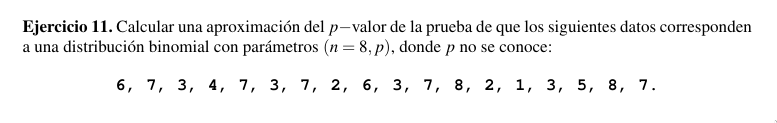

In [37]:
N = np.array([6, 7, 3, 4, 7, 3, 7, 2, 6, 3, 7, 8, 2, 1, 3, 5, 8, 7])
media = np.mean(N)
n = len(N)
frec_obs = np.bincount(N)

# Buscar una aprox. para p
# Por el teorico
elems = np.unique(N)
p_som = media / len(elems)

print(p_som)

#Estadistico
def T(datos, frec, p):
  n = len(datos)
  N = frec
  k = len(N)
  t = 0
  rv = binom(k-1, p)
  for i in range(k):
    p_i = rv.pmf(i)
    t += (N[i] - n*p_i)**2 / (n*p_i)
  return t

t = T(N, frec_obs, p_som)
# Tenemos que si m = numero de parametros para pi
# Entonces los grados de libertad = k - 1 - m = 8 - 1 - 1 = 6
print(f"T de Pearson: {t}")
print(f"p-valor: {1-chi2.cdf(t, 6)}")


# Simulacion
def simulacion(datos, frec, p, nsim):
  n = len(datos)
  k = len(frec)
  pvalor = 0
  t = T(datos, frec, p)
  for i in range(nsim):
    # Simular muestra
    muestra = binom.rvs(k-1, p, size=n)

    #Simular psim
    elems = np.unique(muestra)
    psim = np.mean(muestra) / len(elems)
    frec = np.bincount(muestra)

    #Calcular nuevo estadistico
    t1 = T(datos, frec, psim)

    if t1 >= t:
      pvalor += 1

  return pvalor/nsim

print(f"p-valor simulado: {simulacion(N, frec_obs, p_som, 10_000)}")

0.6180555555555556
T de Pearson: 31.49933093415532
p-valor: 2.034860899247093e-05


<ipython-input-37-c20a1cfcb3e0>:22: RuntimeWarning: invalid value encountered in scalar divide
  t += (N[i] - n*p_i)**2 / (n*p_i)
<ipython-input-37-c20a1cfcb3e0>:22: RuntimeWarning: divide by zero encountered in scalar divide
  t += (N[i] - n*p_i)**2 / (n*p_i)


p-valor simulado: 0.4918
